In [2]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp, solve_bvp
from scipy.optimize import minimize

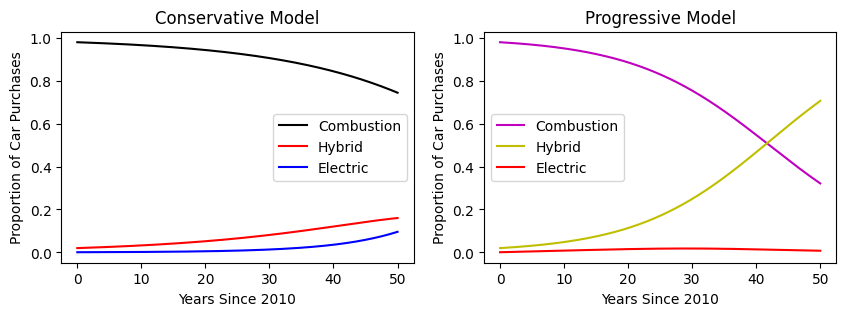

In [9]:
# build model
def model(t, cars, ch, he, ec, hc, eh, ce, c, h, e):
    return np.array([(hc-ch)*cars[0]*cars[1] + (ec-ce)*cars[0]*cars[2] + c,
                     (ch-hc)*cars[0]*cars[1] + (eh-he)*cars[1]*cars[2] + h,
                     (ce-ec)*cars[0]*cars[2] + (he-eh)*cars[1]*cars[2] + e])

# constants
ch = 0.15 # rate from combustion to hybrid
he = 0.2 # rate from hybrid to electric
ec = 0.01 # rate from electric to combustion
hc = 0.1 # rate from hybrid to combustion
eh = 0.01 # rate from electric to hybrid
ce = 0.1 # rate from combustion to electric
c = 0.0 # rate of new combustion
h = 0.0 # rate of new hybrid
e = 0.0 # rate of new electric

# ch = 0.19 # rate from combustion to hybrid
# he = 0.2 # rate from hybrid to electric
# ec = 0.01 # rate from electric to combustion
# hc = 0.1 # rate from hybrid to combustion
# eh = 0.18 # rate from electric to hybrid
# ce = 0.1 # rate from combustion to electric
# c = 0.0 # rate of new combustion
# h = 0.0 # rate of new hybrid
# e = 0.0005 # rate of new electric

# initial conditions
C = 0.9792
H = 0.02
E = 0.0008

# time points
t0 = 0
tf = 50

# solve ODE
sol = solve_ivp(model, [t0, tf], [C, H, E], args=(ch, he, ec, hc, eh, ce, c, h, e), t_eval=np.linspace(t0, tf, 1000))

# ch = 0.19 # rate from combustion to hybrid
# he = 0.2 # rate from hybrid to electric
# ec = 0.01 # rate from electric to combustion
# hc = 0.1 # rate from hybrid to combustion
# eh = 0.18 # rate from electric to hybrid
# ce = 0.1 # rate from combustion to electric
# c = 0.0 # rate of new combustion
# h = 0.0 # rate of new hybrid
# e = 0.0007 # rate of new electric

ch = 0.19 # rate from combustion to hybrid
he = 0.2 # rate from hybrid to electric
ec = 0.080 # rate from electric to combustion
hc = 0.1 # rate from hybrid to combustion
eh = 0.43 # rate from electric to hybrid
ce = 0.1 # rate from combustion to electric
c = 0.0 # rate of new combustion
h = 0.0 # rate of new hybrid
e = 0.0007 # rate of new electric

sol2 = solve_ivp(model, [t0, tf], [C, H, E], args=(ch, he, ec, hc, eh, ce, c, h, e), t_eval=np.linspace(t0, tf, 1000))

# plot
plt.figure(figsize=(10, 3))
plt.subplot(121)
plt.plot(sol.t, sol.y[0], label="Combustion", c="k")
plt.plot(sol.t, sol.y[1], label="Hybrid", c="r")
plt.plot(sol.t, sol.y[2], label="Electric", c="b")
plt.title("Conservative Model")
plt.xlabel("Years Since 2010")
plt.ylabel("Proportion of Car Purchases")
plt.legend()

plt.subplot(122)
plt.plot(sol2.t, sol2.y[0], label="Combustion", c="m")
plt.plot(sol2.t, sol2.y[1], label="Hybrid", c="y")
plt.plot(sol2.t, sol2.y[2], label="Electric", c="r")
plt.title("Progressive Model")
plt.xlabel("Years Since 2010")
plt.ylabel("Proportion of Car Purchases")
plt.legend()
plt.show()

In [4]:
# print values at t=10
print(len(sol2.y[0]))
year = 2020
time = int((year - 2010) * 1000 / tf)
print(time)
print("Combustion: ", sol2.y[0][time])
print("Hybrid: ", sol2.y[1][time])
print("Electric: ", sol2.y[2][time])

1000
200
Combustion:  0.9580317504637522
Hybrid:  0.04793549748710141
Electric:  0.0010397590561534553
